In [1]:
#THIS CODE FOR Batch Norm after add diagram only
import keras
from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Input, Merge, ZeroPadding2D, merge
from keras.preprocessing import image
from scipy.misc import imsave, imread, imresize, toimage
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Dense, Flatten
from keras.utils import plot_model
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


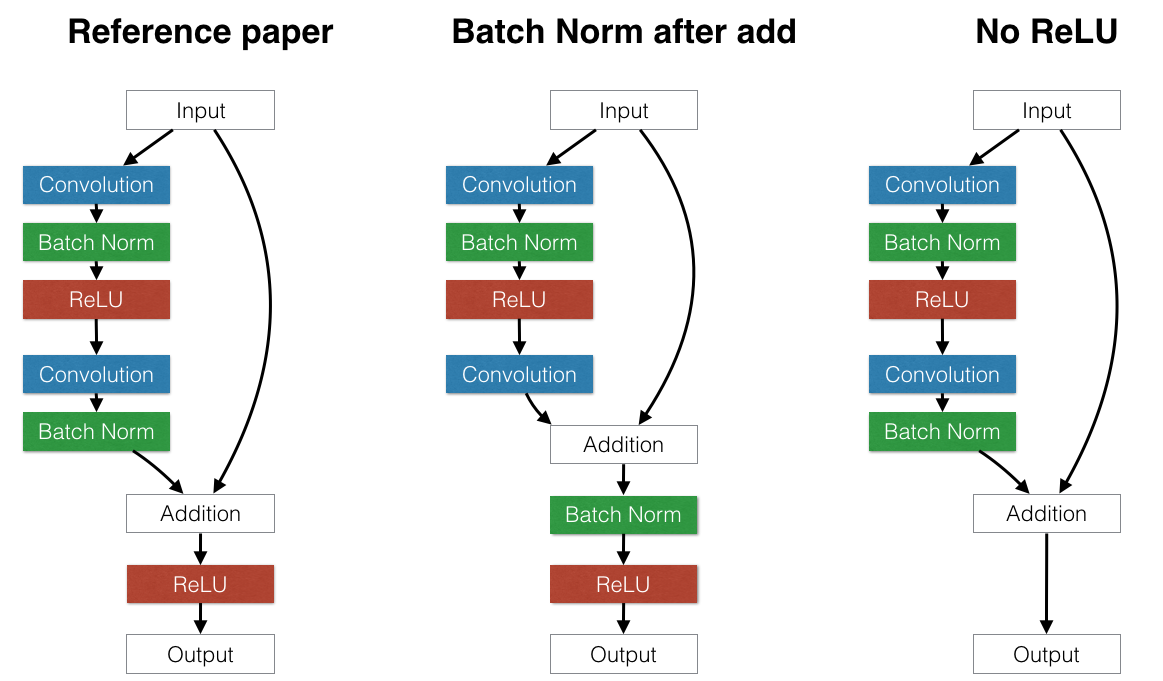

In [2]:
from IPython.display import Image
Image('B.png')

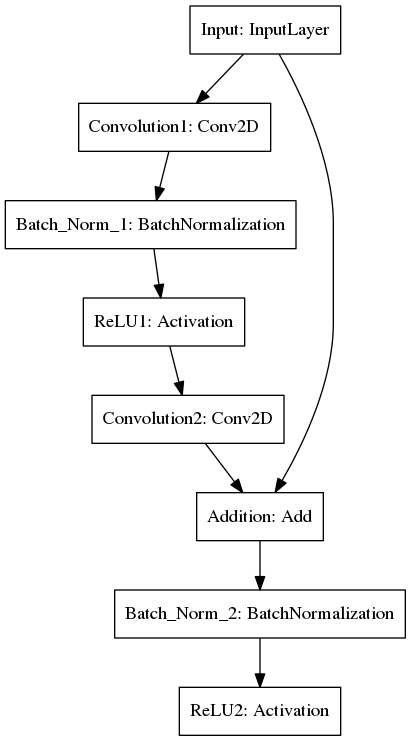

In [3]:
#Reference paper
from IPython.display import Image
Image('WAZIRRESIDUAL.png')

In [4]:
inputs = Input(shape=(32,32,1),name='Input') #A THIS PART OF CHANNEL 1 ISAME AS 
c = Conv2D(3,(3,3), padding='same',name='Convolution1')(inputs)
b = BatchNormalization(axis = 3, name = 'Batch_Norm_1')(c)
r = Activation('relu',name='ReLU1')(b)
c1 = Conv2D(3,(3,3), padding='same',name='Convolution2')(r)


z = keras.layers.add([inputs,c1],name='Addition')

b1 = BatchNormalization(axis = 3, name = 'Batch_Norm_2')(z)
r  = Activation('relu',name='ReLU2')(b1)


model=Model(inputs,r)

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
Convolution1 (Conv2D)           (None, 32, 32, 3)    30          Input[0][0]                      
__________________________________________________________________________________________________
Batch_Norm_1 (BatchNormalizatio (None, 32, 32, 3)    12          Convolution1[0][0]               
__________________________________________________________________________________________________
ReLU1 (Activation)              (None, 32, 32, 3)    0           Batch_Norm_1[0][0]               
__________________________________________________________________________________________________
Convolutio

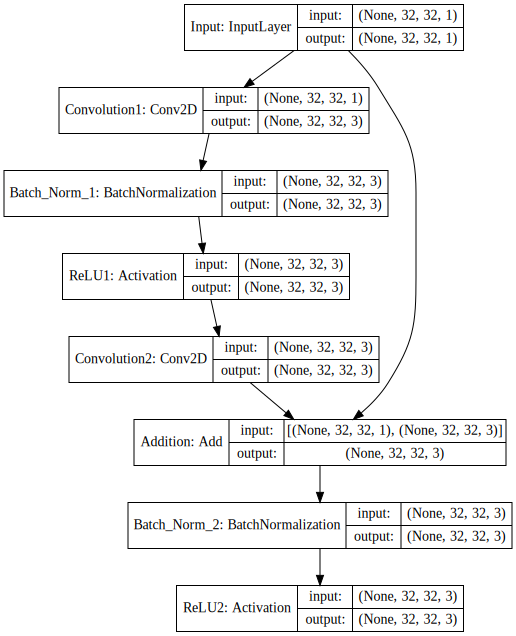

In [6]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
plot_model(model, to_file='WAZIRRESIDUAL.png')